In [1]:
# pip install matplotlib seaborn nltk
# pip install openpyxl --upgrade
# pip install transformers
# pip install ipywidgets
# pip install -U jupyter
# pip install tensorflow
# pip install tf-keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from transformers import pipeline

#### Data cleaning

In [3]:
gg_df = pd.read_excel('google_review.xlsx')
gg_df.head(5)

,NBa7we src,d4r55,eaLgGf,hCCjke,rsqaWe,RfnDt,wiI7pd,dSlJg,dSlJg 2,znYl0 2,Hzvxle,pkWtMe
0,https://lh3.googleusercontent.com/a-/ALV-UjUKm...,Karim Sk,,,a day ago,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://lh3.googleusercontent.com/a/ACg8ocIPOE...,SHAHAJI HOLKAR,,,2 days ago,3 reviews,NaN,NaN,NaN,NaN,NaN,NaN
2,https://lh3.googleusercontent.com/a-/ALV-UjU5B...,Anjal Maharjan,,,6 days ago,5 reviews · 10 photos,it's 'aight,,,Share,NaN,NaN
3,https://lh3.googleusercontent.com/a-/ALV-UjWnx...,Watchara1964 Thammakit,,,2 weeks ago,Local Guide · 112 reviews · 284 photos,NaN,NaN,NaN,NaN,NaN,NaN
4,https://lh3.googleusercontent.com/a-/ALV-UjXYP...,Sameer Shrestha,,,2 weeks ago,1 review,Doesn't give proper response.,,,Share,Like,1.0


**Continue:**
- Append seek_review.xlsx into df

In [4]:
# keep columns: date, review text
col_list = ['wiI7pd', 'rsqaWe']
gg_df = gg_df[col_list]
gg_df

,wiI7pd,rsqaWe
0,NaN,a day ago
1,NaN,2 days ago
2,it's 'aight,6 days ago
3,NaN,2 weeks ago
4,Doesn't give proper response.,2 weeks ago
...,...,...
794,NaN,13 years ago
795,NaN,13 years ago
796,NaN,13 years ago
797,Graduate,13 years ago


In [5]:
# rename columns
# col_name = ['Review']
gg_df = gg_df.rename(columns = {'wiI7pd':'review_text', 'rsqaWe':'review_time'})
gg_df

,review_text,review_time
0,NaN,a day ago
1,NaN,2 days ago
2,it's 'aight,6 days ago
3,NaN,2 weeks ago
4,Doesn't give proper response.,2 weeks ago
...,...,...
794,NaN,13 years ago
795,NaN,13 years ago
796,NaN,13 years ago
797,Graduate,13 years ago


In [6]:
# drop rows with missing reviews
gg_df.dropna(inplace=True)
gg_df['source'] = 'Google Review'
gg_df.head()

,review_text,review_time,source
2,it's 'aight,6 days ago,Google Review
4,Doesn't give proper response.,2 weeks ago,Google Review
5,Worst school ever especially international stu...,3 weeks ago,Google Review
8,"My favorite person, Nahyun Kim, goes to this s...",a month ago,Google Review
9,The University of Technology Sydney provides a...,a month ago,Google Review


In [7]:
gg_df['review_time'].unique()

array(['6 days ago', '2 weeks ago', '3 weeks ago', 'a month ago',
       '2 months ago', '3 months ago', '4 months ago', '5 months ago',
       '6 months ago', '7 months ago', '8 months ago', '10 months ago',
       '11 months ago', 'a year ago', '2 years ago', '3 years ago',
       '4 years ago', '5 years ago', '6 years ago', '7 years ago',
       '8 years ago', '9 years ago', '10 years ago', '11 years ago',
       '13 years ago'], dtype=object)

In [8]:
# process the year:
gg_df['review_year'] = gg_df['review_time'].replace(['6 days ago', '2 weeks ago', '3 weeks ago', 'a month ago',
                                                   '2 months ago', '3 months ago', '4 months ago', '5 months ago',
                                                   '6 months ago', '7 months ago', '8 months ago'], 2024)

replace_with = {'2 years ago': 2022, '3 years ago': 2021, '4 years ago':2020, '5 years ago':2019, '6 years ago':2018, '7 years ago':2017,
               '8 years ago':2016, '9 years ago': 2015, '10 years ago':2014, '11 years ago':2013, '13 years ago':2011}
gg_df['review_year'] = gg_df['review_year'].replace(['10 months ago', '11 months ago', 'a year ago'], 2023)
gg_df['review_year'] = gg_df['review_year'].replace(replace_with)

C:\Users\Dell Latitude E7390\AppData\Local\Temp\ipykernel_18056\972309476.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gg_df['review_year'] = gg_df['review_year'].replace(replace_with)


In [9]:
# gg_df
# gg_df['review_year'].unique()

In [10]:
seek_df = pd.read_csv('seek_review.csv')
seek_df = seek_df.rename(columns = {'comments_name':'review_text', 'comments_time':'review_time'})
seek_df['source'] = 'Seek Review'
seek_df.head()

,review_text,review_time,source
0,I think it is a good course.,Published Jul 2024,Seek Review
1,"The course was delivered as online study, most...",Published Jul 2024,Seek Review
2,"Pros: All lecturers are very nice, supportive ...",Published Jul 2024,Seek Review
3,The course focuses on contextualising learning...,Published Jul 2024,Seek Review
4,The course provides general information betwee...,Published Jun 2024,Seek Review


In [11]:
seek_df['review_time'].unique()

array(['Published Jul 2024', 'Published Jun 2024', 'Published May 2024',
       'Published Apr 2024', 'Published Mar 2024', 'Published Feb 2024',
       'Published Jan 2024', 'Published Dec 2023', 'Published Nov 2023',
       'Published Oct 2023', 'Published Sep 2023', 'Published Aug 2023',
       'Published Dec 2021', 'Published Jun 2021', 'Published Sep 2018',
       'Published Aug 2018', 'Published Jul 2018', 'Published Jun 2018',
       'Published May 2018', 'Published Apr 2018'], dtype=object)

In [12]:
seek_df['review_year'] = seek_df['review_time'].str[-4:]
seek_df

,review_text,review_time,source,review_year
0,I think it is a good course.,Published Jul 2024,Seek Review,2024
1,"The course was delivered as online study, most...",Published Jul 2024,Seek Review,2024
2,"Pros: All lecturers are very nice, supportive ...",Published Jul 2024,Seek Review,2024
3,The course focuses on contextualising learning...,Published Jul 2024,Seek Review,2024
4,The course provides general information betwee...,Published Jun 2024,Seek Review,2024
...,...,...,...,...
595,Course itself was conveniently provided throug...,Published May 2018,Seek Review,2018
596,It followed on from the Juris Doctor degree an...,Published Apr 2018,Seek Review,2018
597,The course is great. Even though not all subje...,Published Apr 2018,Seek Review,2018
598,Good overall experience,Published Apr 2018,Seek Review,2018


In [13]:
seek_df['review_year'] = seek_df['review_year'].astype(int)

In [14]:
df = pd.concat([gg_df, seek_df]).reset_index(drop=True)
df

,review_text,review_time,source,review_year
0,it's 'aight,6 days ago,Google Review,2024
1,Doesn't give proper response.,2 weeks ago,Google Review,2024
2,Worst school ever especially international stu...,3 weeks ago,Google Review,2024
3,"My favorite person, Nahyun Kim, goes to this s...",a month ago,Google Review,2024
4,The University of Technology Sydney provides a...,a month ago,Google Review,2024
...,...,...,...,...
920,Course itself was conveniently provided throug...,Published May 2018,Seek Review,2018
921,It followed on from the Juris Doctor degree an...,Published Apr 2018,Seek Review,2018
922,The course is great. Even though not all subje...,Published Apr 2018,Seek Review,2018
923,Good overall experience,Published Apr 2018,Seek Review,2018


In [15]:
# Check data types:
df.dtypes

review_text    object
review_time    object
source         object
review_year     int64
dtype: object

In [16]:
df['review_year'].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014,
       2013, 2011], dtype=int64)

In [17]:
## Pie chart to see data source proportion

#### Data preprocessing
- tokenization
- stop words removal
- lemmatization

Tokenization in NLTK (example per row)

In [18]:
example = df['review_text'][5]
print(example)

this place was so stinky and I hated it


In [19]:
nltk.word_tokenize(example)

['this', 'place', 'was', 'so', 'stinky', 'and', 'I', 'hated', 'it']

## Sentiment analysis model

#### 1. VADER sentiment scoring

Start with **VADER Sentiment Scoring**
- Does not take into relationship of words
- Pretrained -> not that sensitive

In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm # progress bar tracker

In [21]:
# nltk.download('vader_lexicon')

In [22]:
sia = SentimentIntensityAnalyzer()

In [23]:
sia

Example testing for ```SentimentIntensityAnalyzer()```

In [24]:
sia.polarity_scores('I love myself')

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

In [25]:
sia.polarity_scores('I have doubts about that.')

{'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'compound': -0.296}

In [26]:
sia.polarity_scores(example)

{'neg': 0.562, 'neu': 0.438, 'pos': 0.0, 'compound': -0.8274}

In [27]:
df.iterrows()

<generator object DataFrame.iterrows at 0x000002236DA1A420>

In [28]:
# Add for comparison with VADER model
df['positive'] = [sia.polarity_scores(i)['pos'] for i in df['review_text']]
df['negative'] = [sia.polarity_scores(i)['neg'] for i in df['review_text']]
df['neutral'] = [sia.polarity_scores(i)['neu'] for i in df['review_text']]
df['vader_score'] = [sia.polarity_scores(i)['compound'] for i in df['review_text']]

positive  = df["positive"]
negative = df["negative"]
neutral = df["neutral"]

In [29]:
def _conditions2(positive, negative, neutral):    
    if positive == 1: sentiment = "positive"
    elif positive > negative and positive > neutral: sentiment = "positive"
    elif negative == 1:     sentiment = "negative"
    elif negative > positive and negative > neutral: sentiment = "negative"
    elif neutral > positive and neutral > negative:     sentiment = "neutral"
    else: sentiment = "err"
    
    return sentiment
# Vectorize the function
func = np.vectorize(_conditions2)
# Create a new clumn based on the function
df["vader_sentiment"] = func(positive, negative, neutral)

In [30]:
# drop unnecessary columns:
df = df.drop(['positive', 'negative', 'neutral'], axis=1)

### 2. Hugging Face model:
https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest

In [31]:
from transformers import pipeline
model_path = 'cardiffnlp/twitter-roberta-base-sentiment-latest'
# sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
# sentiment_task("Covid cases are increasing fast!")

In [32]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
from scipy.special import softmax

In [33]:
# pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

In [34]:
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

sentiment_task = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

C:\Users\Dell Latitude E7390\miniconda3\envs\projects\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model 

In [35]:
# Test:
sentiment_task("Covid cases are increasing fast!")

[{'label': 'negative', 'score': 0.7235764861106873}]

In [36]:
# Test:
example = df['review_text'][4]
example

'The University of Technology Sydney provides an excellent education with cutting-edge facilities and a strong emphasis on industry connections. Its diverse programs and vibrant campus life offer a well-rounded experience for students. Highly recommended for a forward-thinking education.'

In [37]:
# Test --> improve than the VADER model
sentiment_task(example)

[{'label': 'positive', 'score': 0.9762760400772095}]

In [38]:
# review_list = [i for i in df['review_text']]
# review_list

In [39]:
# Test the sentiment model
# for text in df['review_text']:
#     sentiment = sentiment_task(text)
#     print(f"Review: {text}\nSentiment: {sentiment}\n")

In [40]:
# extract the label & the score to new columns
df['roberta_sentiment'] = [sentiment_task(text)[0]['label'] for text in df['review_text']]
df['roberta_score'] = [sentiment_task(text)[0]['score'] for text in df['review_text']]

In [41]:
df.head()

,review_text,review_time,source,review_year,vader_score,vader_sentiment,roberta_sentiment,roberta_score
0,it's 'aight,6 days ago,Google Review,2024,0.0000,neutral,neutral,0.515592
1,Doesn't give proper response.,2 weeks ago,Google Review,2024,0.0000,neutral,negative,0.846522
2,Worst school ever especially international stu...,3 weeks ago,Google Review,2024,-0.6249,neutral,negative,0.952750
3,"My favorite person, Nahyun Kim, goes to this s...",a month ago,Google Review,2024,0.4588,neutral,positive,0.961180
4,The University of Technology Sydney provides a...,a month ago,Google Review,2024,0.9099,neutral,positive,0.976276


#### Sentiment Visualization

In [42]:
roberta_sentiment_counts = df['roberta_sentiment'].value_counts()
roberta_sentiment_counts

roberta_sentiment
positive    674
negative    128
neutral     123
Name: count, dtype: int64

In [43]:
vader_sentiment_counts = df['vader_sentiment'].value_counts()
vader_sentiment_counts

vader_sentiment
neutral     809
positive    110
negative      6
Name: count, dtype: int64

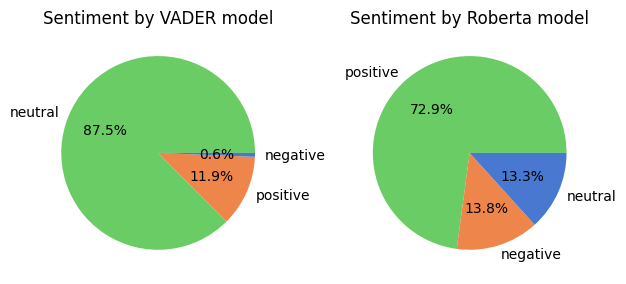

In [44]:
fig, axs = plt.subplots(1,2)
# colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
muted_palette = sns.color_palette("muted")

color_palette = {
    'positive': muted_palette[2],  # First color in the muted palette
    'neutral': muted_palette[1],   # Second color in the muted palette
    'negative': muted_palette[0]   # Third color in the muted palette
}

vader_colors = [color_palette['positive'], color_palette['neutral'], color_palette['negative']]
roberta_colors = [color_palette['positive'], color_palette['neutral'], color_palette['negative']]

axs[0].pie(vader_sentiment_counts, labels=vader_sentiment_counts.index, autopct='%1.1f%%', colors=vader_colors)
axs[0].set_title('Sentiment by VADER model')
axs[1].pie(roberta_sentiment_counts, labels=roberta_sentiment_counts.index, autopct='%1.1f%%', colors=roberta_colors)
axs[1].set_title('Sentiment by Roberta model')
plt.tight_layout()
plt.show()

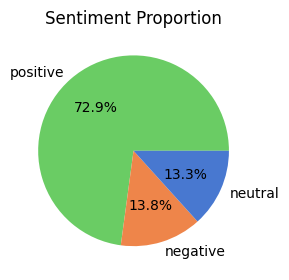

In [45]:
# colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig, ax = plt.subplots(figsize=(3, 3))
muted_palette = sns.color_palette("muted")

color_palette = {
    'positive': muted_palette[2],  # First color in the muted palette
    'neutral': muted_palette[1],   # Second color in the muted palette
    'negative': muted_palette[0]   # Third color in the muted palette
}

# vader_colors = [color_palette['positive'], color_palette['neutral'], color_palette['negative']]
roberta_colors = [color_palette['positive'], color_palette['neutral'], color_palette['negative']]

ax.pie(roberta_sentiment_counts, labels=roberta_sentiment_counts.index, autopct='%1.1f%%', colors=roberta_colors)
ax.set_title('Sentiment Proportion')
plt.tight_layout()
plt.show()

##### Sentiments Over the Year

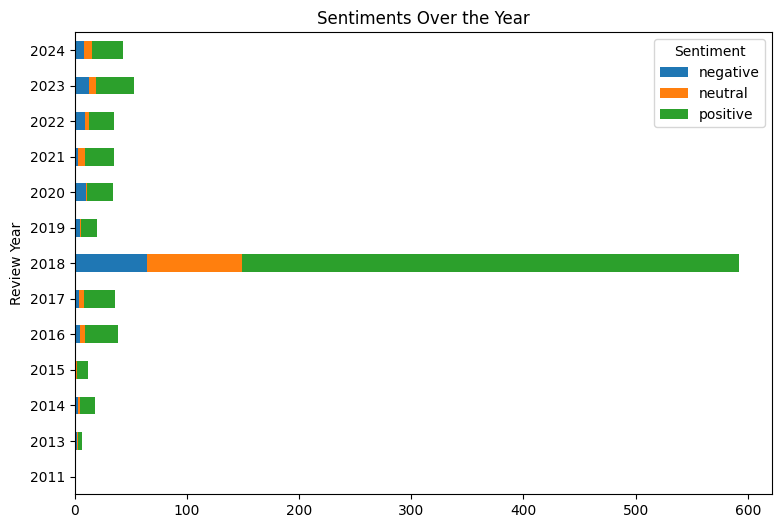

In [46]:
ax = df.groupby(['review_year', 'roberta_sentiment']).size().unstack().plot(kind='barh', stacked=True, figsize=(9, 6))
# Set the title
ax.set_title('Sentiments Over the Year')
ax.set_ylabel('Review Year')

# Set the legend title
ax.legend(title='Sentiment')

# Show the plot
plt.show()

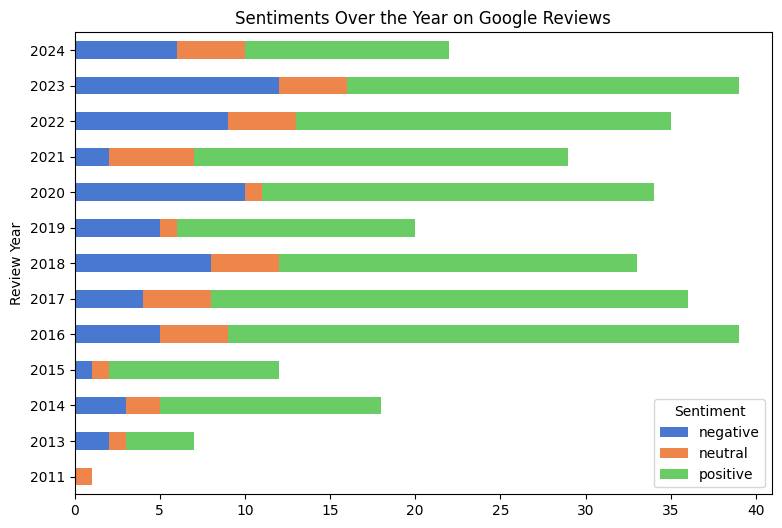

In [47]:
import seaborn as sns

google_review = df[df['source'] == 'Google Review']

sns.set_palette("muted")

ax = google_review.groupby(['review_year', 'roberta_sentiment']).size().unstack().plot(kind='barh', stacked=True, figsize=(9, 6))
# Set the title
ax.set_title('Sentiments Over the Year on Google Reviews')
ax.set_ylabel('Review Year')

# Set the legend title
ax.legend(title='Sentiment')

# Annotate each bar with the data value
# for container in ax.containers:
#     ax.bar_label(container)

# Show the plot
plt.show()

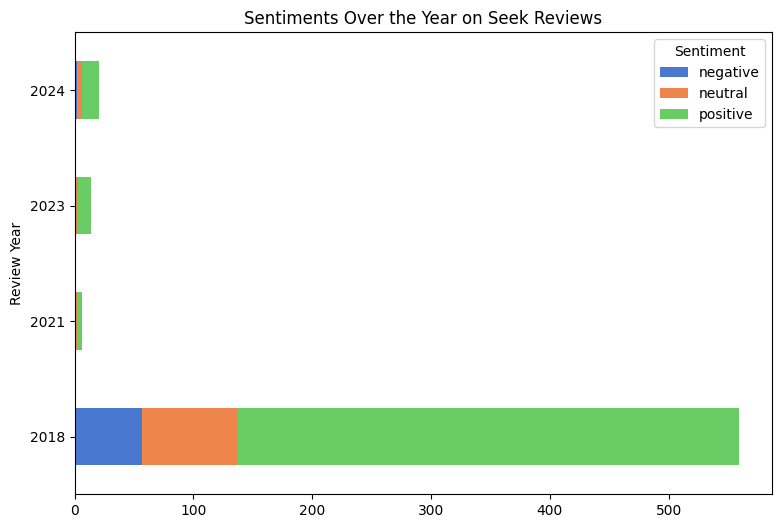

In [48]:
import seaborn as sns

seek_review = df[df['source'] == 'Seek Review']

sns.set_palette("muted")

ax = seek_review.groupby(['review_year', 'roberta_sentiment']).size().unstack().plot(kind='barh', stacked=True, figsize=(9, 6))
# Set the title
ax.set_title('Sentiments Over the Year on Seek Reviews')
ax.set_ylabel('Review Year')

# Set the legend title
ax.legend(title='Sentiment')

# Annotate each bar with the data value
# for container in ax.containers:
#     ax.bar_label(container)

# Show the plot
plt.show()

##### Testing normal WORDCLOUD

In [49]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

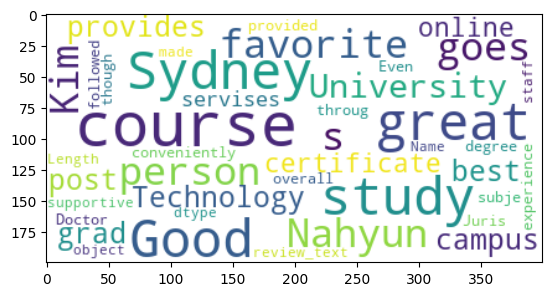

In [50]:
positive_reviews = df['review_text'][df['roberta_sentiment'] == 'positive']
stop_words = list(STOPWORDS)

positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(positive_reviews))
plt.figure()
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.show()

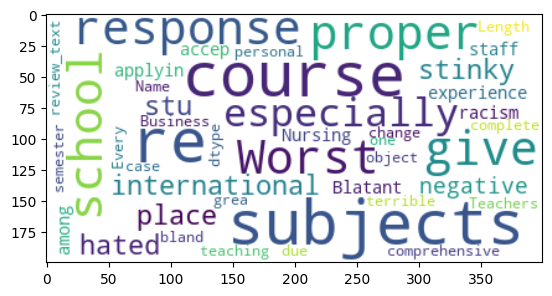

In [51]:
negative_reviews = df['review_text'][df['roberta_sentiment'] == 'negative']
stop_words = list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(negative_reviews))
plt.figure()
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.show()

In [52]:
df.head()

,review_text,review_time,source,review_year,vader_score,vader_sentiment,roberta_sentiment,roberta_score
0,it's 'aight,6 days ago,Google Review,2024,0.0000,neutral,neutral,0.515592
1,Doesn't give proper response.,2 weeks ago,Google Review,2024,0.0000,neutral,negative,0.846522
2,Worst school ever especially international stu...,3 weeks ago,Google Review,2024,-0.6249,neutral,negative,0.952750
3,"My favorite person, Nahyun Kim, goes to this s...",a month ago,Google Review,2024,0.4588,neutral,positive,0.961180
4,The University of Technology Sydney provides a...,a month ago,Google Review,2024,0.9099,neutral,positive,0.976276


#### Processing for WORDCLOUD

In [53]:
# Filter the sentiment categories
# df['positive'] = df.apply(lambda row: row['review_text'] if row['roberta_sentiment'] == 'positive' else '', axis=1)
# df['negative'] = df.apply(lambda row: row['review_text'] if row['roberta_sentiment'] == 'negative' else '', axis=1)
# df

In [54]:
# review_txt = df[['positive', 'negative']]
# review_txt

In [55]:
# path = r'C:\Users\Dell Latitude E7390\OneDrive - UTS\Deep Dive\Projects\UTS\uts_review_analysis\review.txt'

# with open(path, 'a', encoding='utf-8') as f:
#     review_string = review_txt.to_string(header=False, index=False)
#     f.write(review_string)

In [56]:
# review_txt.to_excel('review_txt.xlsx',index=False)

#### Improvement of text visualization

- tokenize + lemmatize text --> create new variables
- calculate the frequencies of occurring meaningful phrases
- visualize top 10-15

In [57]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud

In [58]:
# Download necessary NLTK datasets
nltk.download('punkt') #pre-trained model dividing text into a list of sentences/words
nltk.download('stopwords')

# List of stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to C:\Users\Dell Latitude
[nltk_data]     E7390\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Dell Latitude
[nltk_data]     E7390\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
# df.head()

In [60]:
# Tokenization and preprocessing
#split review into single words (tokens)
df['Tokens'] = df['review_text'].apply(lambda x: word_tokenize(x.lower()))
#filter out stop words (is am are etc..) and words that are all characters (Helw#$#@o)
df['Filtered_Tokens'] = df['Tokens'].apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words])
df

,review_text,review_time,source,review_year,vader_score,vader_sentiment,roberta_sentiment,roberta_score,Tokens,Filtered_Tokens
0,it's 'aight,6 days ago,Google Review,2024,0.0000,neutral,neutral,0.515592,"[it, 's, 'aight]",[]
1,Doesn't give proper response.,2 weeks ago,Google Review,2024,0.0000,neutral,negative,0.846522,"[does, n't, give, proper, response, .]","[give, proper, response]"
2,Worst school ever especially international stu...,3 weeks ago,Google Review,2024,-0.6249,neutral,negative,0.952750,"[worst, school, ever, especially, internationa...","[worst, school, ever, especially, internationa..."
3,"My favorite person, Nahyun Kim, goes to this s...",a month ago,Google Review,2024,0.4588,neutral,positive,0.961180,"[my, favorite, person, ,, nahyun, kim, ,, goes...","[favorite, person, nahyun, kim, goes, school]"
4,The University of Technology Sydney provides a...,a month ago,Google Review,2024,0.9099,neutral,positive,0.976276,"[the, university, of, technology, sydney, prov...","[university, technology, sydney, provides, exc..."
...,...,...,...,...,...,...,...,...,...,...
920,Course itself was conveniently provided throug...,Published May 2018,Seek Review,2018,0.0000,neutral,positive,0.616924,"[course, itself, was, conveniently, provided, ...","[course, conveniently, provided, campus, facil..."
921,It followed on from the Juris Doctor degree an...,Published Apr 2018,Seek Review,2018,0.0000,neutral,positive,0.514892,"[it, followed, on, from, the, juris, doctor, d...","[followed, juris, doctor, degree, course, cont..."
922,The course is great. Even though not all subje...,Published Apr 2018,Seek Review,2018,0.9349,neutral,positive,0.863064,"[the, course, is, great, ., even, though, not,...","[course, great, even, though, subjects, great,..."
923,Good overall experience,Published Apr 2018,Seek Review,2018,0.4404,positive,positive,0.959518,"[good, overall, experience]","[good, overall, experience]"


C:\Users\Dell Latitude E7390\AppData\Local\Temp\ipykernel_18056\1761481030.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for word, count in most_common_words], y=[word for word, count in most_common_words], palette='ch:start=.5,rot=-.5')


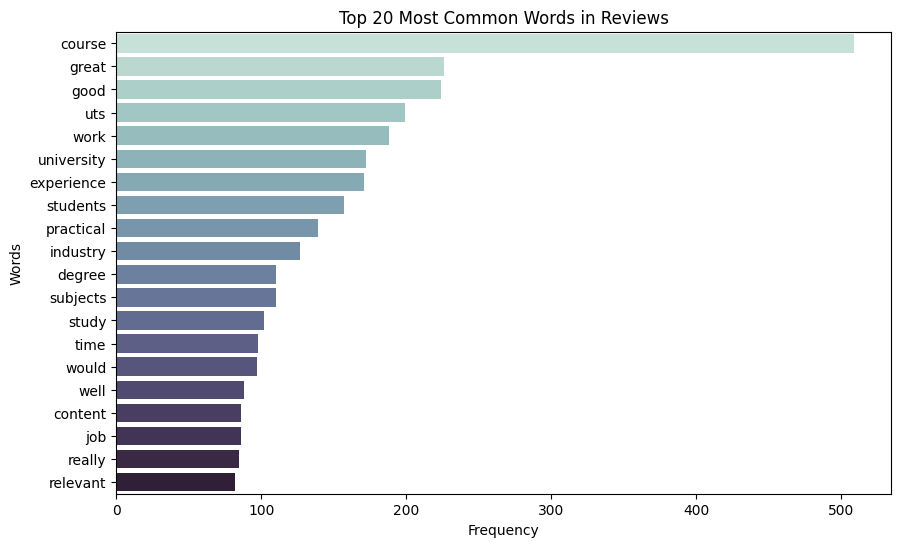

[('course', 509),
 ('great', 226),
 ('good', 224),
 ('uts', 199),
 ('work', 188),
 ('university', 172),
 ('experience', 171),
 ('students', 157),
 ('practical', 139),
 ('industry', 127),
 ('degree', 110),
 ('subjects', 110),
 ('study', 102),
 ('time', 98),
 ('would', 97),
 ('well', 88),
 ('content', 86),
 ('job', 86),
 ('really', 85),
 ('relevant', 82)]

In [61]:
# Flatten the list of tokens and count the words
all_words = [word for tokens in df['Filtered_Tokens'] for word in tokens]
word_counts = Counter(all_words)

# Most common words
most_common_words = word_counts.most_common(20)

## Specific sentiments:
negative_words = [word for tokens in df.loc[df['roberta_sentiment'] == 'negative', 'Filtered_Tokens'] for word in tokens]
positive_words = [word for tokens in df.loc[df['roberta_sentiment'] == 'positive', 'Filtered_Tokens'] for word in tokens]
negative_counts = Counter(negative_words)
positive_counts = Counter(positive_words)
most_common_negative = negative_counts.most_common(15)
most_common_positive = positive_counts.most_common(15)

# sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
# Plotting the Word Frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=[count for word, count in most_common_words], y=[word for word, count in most_common_words], palette='ch:start=.5,rot=-.5')
plt.title('Top 20 Most Common Words in Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

most_common_words

In [62]:
# Function to generate and count ngrams
def generate_ngrams(tokens_list, n):
    ngrams_list = ngrams(tokens_list, n)
    ngrams_counts = Counter(ngrams_list)
    return ngrams_counts

# Generating bigrams (2-grams) and trigrams (3-grams)
df['Bigrams'] = df['Filtered_Tokens'].apply(lambda x: generate_ngrams(x, 2))
df['Trigrams'] = df['Filtered_Tokens'].apply(lambda x: generate_ngrams(x, 3))
# df['Fourgrams'] = df['Filtered_Tokens'].apply(lambda x: generate_ngrams(x, 4))

df.head()

,review_text,review_time,source,review_year,vader_score,vader_sentiment,roberta_sentiment,roberta_score,Tokens,Filtered_Tokens,Bigrams,Trigrams
0,it's 'aight,6 days ago,Google Review,2024,0.0000,neutral,neutral,0.515592,"[it, 's, 'aight]",[],{},{}
1,Doesn't give proper response.,2 weeks ago,Google Review,2024,0.0000,neutral,negative,0.846522,"[does, n't, give, proper, response, .]","[give, proper, response]","{('give', 'proper'): 1, ('proper', 'response')...","{('give', 'proper', 'response'): 1}"
2,Worst school ever especially international stu...,3 weeks ago,Google Review,2024,-0.6249,neutral,negative,0.952750,"[worst, school, ever, especially, internationa...","[worst, school, ever, especially, internationa...","{('worst', 'school'): 1, ('school', 'ever'): 1...","{('worst', 'school', 'ever'): 1, ('school', 'e..."
3,"My favorite person, Nahyun Kim, goes to this s...",a month ago,Google Review,2024,0.4588,neutral,positive,0.961180,"[my, favorite, person, ,, nahyun, kim, ,, goes...","[favorite, person, nahyun, kim, goes, school]","{('favorite', 'person'): 1, ('person', 'nahyun...","{('favorite', 'person', 'nahyun'): 1, ('person..."
4,The University of Technology Sydney provides a...,a month ago,Google Review,2024,0.9099,neutral,positive,0.976276,"[the, university, of, technology, sydney, prov...","[university, technology, sydney, provides, exc...","{('university', 'technology'): 1, ('technology...","{('university', 'technology', 'sydney'): 1, ('..."


C:\Users\Dell Latitude E7390\AppData\Local\Temp\ipykernel_18056\4259048557.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for trigram, count in most_common_trigrams], y=[' '.join(trigram) for trigram, count in most_common_trigrams], ax=axes[1], palette='viridis')


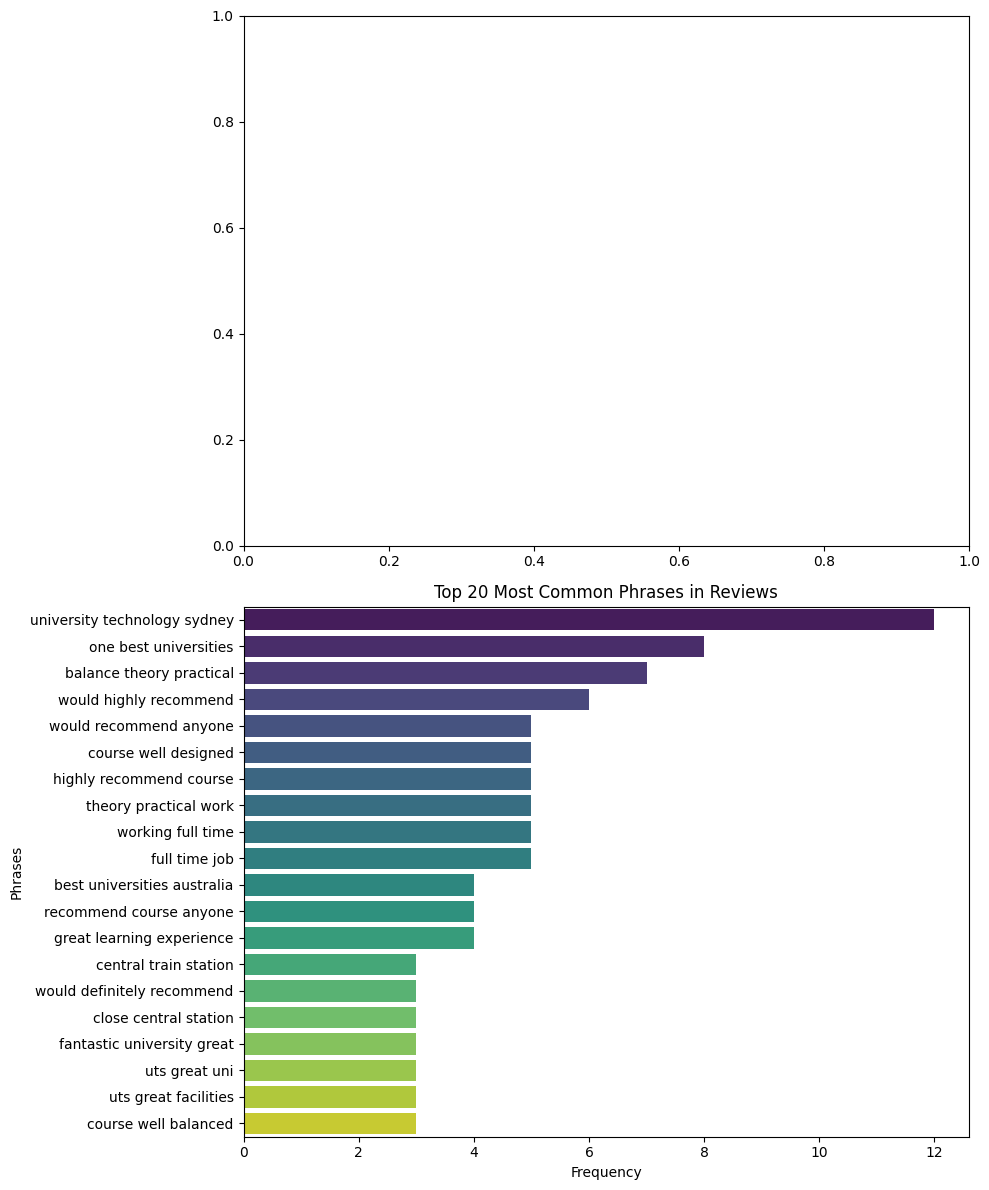

In [73]:
# Initialize counters for bigrams and trigrams
bigram_counts = Counter()
trigram_counts = Counter()
# fourgram_counts = Counter()

# Sum the counts
for bigram_counter in df['Bigrams']:
    bigram_counts.update(bigram_counter)

for trigram_counter in df['Trigrams']:
    trigram_counts.update(trigram_counter)

# for fourgram_counter in df['Fourgrams']:
#     fourgram_counts.update(fourgram_counts)
    
# Most common bigrams and trigrams
most_common_bigrams = bigram_counts.most_common(20)
most_common_trigrams = trigram_counts.most_common(20)
# most_common_fourgrams = fourgram_counts.most_common(20)

# Plotting the most common bigrams and trigrams
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Bigrams
# sns.barplot(x=[count for bigram, count in most_common_bigrams], y=[' '.join(bigram) for bigram, count in most_common_bigrams], ax=axes[0], palette='viridis')
# axes[0].set_title('Top 20 Most Common Bigrams in Reviews')
# axes[0].set_xlabel('Frequency')
# axes[0].set_ylabel('Bigrams')

# Trigrams
sns.barplot(x=[count for trigram, count in most_common_trigrams], y=[' '.join(trigram) for trigram, count in most_common_trigrams], ax=axes[1], palette='viridis')
axes[1].set_title('Top 20 Most Common Phrases in Reviews')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Phrases')

# Fourgrams
# sns.barplot(x=[count for fourgram, count in most_common_fourgrams], y=[' '.join(fourgram) for fourgram, count in most_common_fourgrams], ax=axes[2], palette='viridis')
# axes[2].set_title('Top 20 Most Common Fourgrams in Reviews')
# axes[2].set_xlabel('Frequency')
# axes[2].set_ylabel('Fourgrams')

plt.tight_layout()
plt.show()

In [64]:
# most_common_bigrams

In [65]:
# Function to aggregate and count n-grams for sentiment
def aggregate_ngrams_by_sentiment(data, n):
    ngram_counts_by_sentiment = {}
    for sentiment in df['roberta_sentiment'].unique():
        # Filter reviews for the specific rating
        sentiment_data = df[df['roberta_sentiment'] == sentiment]['Filtered_Tokens']
        
        # Flatten the list of filtered tokens for the specific rating
        all_filtered_tokens_sentiment = [token for sublist in sentiment_data for token in sublist]
        
        # Generating and counting ngrams for the specific rating
        ngram_counts = generate_ngrams(all_filtered_tokens_sentiment, n)
        
        # Most common ngrams for the specific rating
        ngram_counts_by_sentiment[sentiment] = ngram_counts.most_common(20)
    
    return ngram_counts_by_sentiment

# Aggregating and counting bigrams and trigrams for each rating
bigrams_by_sentiment = aggregate_ngrams_by_sentiment(df, 2)
trigrams_by_sentiment = aggregate_ngrams_by_sentiment(df, 3)

# bigrams_by_sentiment, 
trigrams_by_sentiment

{'neutral': [(('university', 'technology', 'sydney'), 3),
  (('university', 'founded', 'current'), 2),
  (('founded', 'current', 'form'), 2),
  (('new', 'south', 'wales'), 2),
  (('study', 'part', 'time'), 2),
  (('fan', 'club', '𝓯𝓻𝓮𝓪𝓴𝔂'), 1),
  (('club', '𝓯𝓻𝓮𝓪𝓴𝔂', 'uts'), 1),
  (('𝓯𝓻𝓮𝓪𝓴𝔂', 'uts', 'tower'), 1),
  (('uts', 'tower', 'uts'), 1),
  (('tower', 'uts', 'offers'), 1),
  (('uts', 'offers', 'diverse'), 1),
  (('offers', 'diverse', 'range'), 1),
  (('diverse', 'range', 'undergraduate'), 1),
  (('range', 'undergraduate', 'postgraduate'), 1),
  (('undergraduate', 'postgraduate', 'programs'), 1),
  (('postgraduate', 'programs', 'across'), 1),
  (('programs', 'across', 'various'), 1),
  (('across', 'various', 'disciplines'), 1),
  (('various', 'disciplines', 'including'), 1),
  (('disciplines', 'including', 'business'), 1)],
 'negative': [(('especially', 'international', 'student'), 2),
  (('work', 'real', 'world'), 2),
  (('uts', 'student', 'support'), 2),
  (('hard', 'get', 'job'),

In [66]:
# dict(trigrams_by_sentiment['negative'])

In [67]:
# trigrams_by_sentiment['negative']

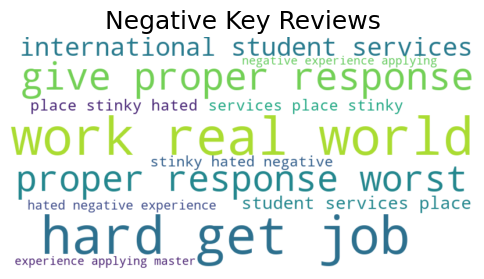

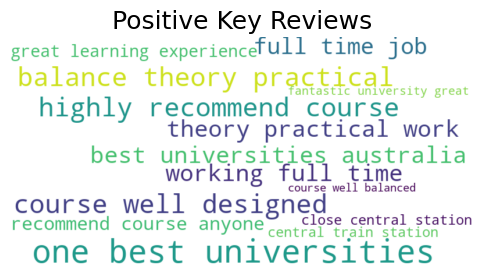

<Figure size 640x480 with 0 Axes>

In [68]:
# List of words to remove
words_to_remove = ['uts', 'uni', 'university' 'sydney', 'technology','school','ever','especially','would']

# Function to generate word cloud
def generate_wordcloud(ngram_counts, title):
     # Remove unwanted words from n-grams
    filtered_ngram_counts = {ngram: count for ngram, count in ngram_counts.items()
                             if not any(word in ngram for word in words_to_remove)}


    word_freq = {' '.join(k): v for k, v in filtered_ngram_counts.items()}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    
    # Plotting the word cloud
    plt.figure(figsize=(6, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18)
    plt.axis('off')
    plt.show()
    
# Generate and display word clouds for each sentiment
# for sentiment in df[df['roberta_sentiment'] == 'negative']:
#     generate_wordcloud(dict(bigrams_by_sentiment[sentiment]), f'Word Cloud for Sentiment {sentiment}')

generate_wordcloud(dict(trigrams_by_sentiment['negative']), f'Negative Key Reviews')
generate_wordcloud(dict(trigrams_by_sentiment['positive']), f'Positive Key Reviews')

# generate_wordcloud(dict(bigrams_by_sentiment['negative']), f'Word Cloud for Bigram negative')
# generate_wordcloud(dict(bigrams_by_sentiment['positive']), f'Word Cloud for Bigram positive')

plt.tight_layout()
plt.show()

In [69]:
# from matplotlib import pyplot as plt

# fig, ax = plt.subplots()
# # First plot the 'Male' bars for every day.
# # bars.
# ax.bar(x=[word for word, count in most_common_positive]
#        , height=[count for word, count in most_common_positive]
#        ,label='positive')

# ax.bar(x=[word for word, count in most_common_negative]
#        , height=[count for word, count in most_common_negative]
#        , bottom=[count for word, count in most_common_positive]
#        , label='Negative')

# ax.set_title('Sentiment in Most common words')
# fig.set_size_inches(20, 10.5, forward=True)
# ax.legend()